# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
#your code here
diamonds = pd.read_csv('diamonds.csv')

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
#your code here
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [6]:
#your code here
'''
carat - float value, weight of the diamond (0.2--5.01)
cut - categorial value, quality of the cut (Fair, Good, Very Good, Premium, Ideal)
color - categorial value, diamond colour, from J (worst) to D (best)
clarity - categorial value, measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
depth - float value with range, total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
table - float value with range, width of top of diamond relative to widest point (43--95)
price - integer with range, price in US dollars (326-18,823)
x - float value with range, length in mm (0--10.74)
y - float value with range, width in mm (0--58.9)
z - float value with range, depth in mm (0--31.8)
'''

'\ncarat - float value, weight of the diamond (0.2--5.01)\ncut - categorial value, quality of the cut (Fair, Good, Very Good, Premium, Ideal)\ncolor - categorial value, diamond colour, from J (worst) to D (best)\nclarity - categorial value, measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))\ndepth - float value with range, total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)\ntable - float value with range, width of top of diamond relative to widest point (43--95)\nprice - integer with range, price in US dollars (326-18,823)\nx - float value with range, length in mm (0--10.74)\ny - float value with range, width in mm (0--58.9)\nz - float value with range, depth in mm (0--31.8)\n'

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [7]:
#your code here
diamonds.shape

(53940, 11)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [8]:
# A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

# Create a dictionary to remap the values 
clarity_dict = {'I1' : 0, 'SI2' : 1, 'SI1' : 2, 'VS2' : 3, 'VS1' : 4, 'VVS2' : 5, 'VVS1' : 6, 'IF' : 7} 
    
# Remap the values of the dataframe 
diamonds.replace({'clarity': clarity_dict}, inplace = True) 

# Print diamonds
diamonds.head()

Unnamed: 0  carat      cut color  clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E        1   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E        2   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E        4   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I        3   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J        1   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [9]:
#Diamond colour, from J (worst) to D (best)
# Create a dictionary to remap the values 
color_dict = {'J' : 0, 'I' : 1, 'H' : 2, 'G' : 3, 'F' : 4, 'E' : 5, 'D' : 6} 
    
# Remap the values of the dataframe 
diamonds.replace({'color': color_dict}, inplace = True) 

# Print diamonds
diamonds.head()

Unnamed: 0  carat      cut  color  clarity  depth  table  price     x  \
0           1   0.23    Ideal      5        1   61.5   55.0    326  3.95   
1           2   0.21  Premium      5        2   59.8   61.0    326  3.89   
2           3   0.23     Good      5        4   56.9   65.0    327  4.05   
3           4   0.29  Premium      1        3   62.4   58.0    334  4.20   
4           5   0.31     Good      0        1   63.3   58.0    335  4.34   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75

In [10]:
diamonds['color'].unique()

array([5, 1, 0, 2, 4, 3, 6])

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [11]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null int64
clarity       53940 non-null int64
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.5+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [12]:
#your code here
diamonds['color'].astype('int64').dtypes

dtype('int64')

In [13]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null int64
clarity       53940 non-null int64
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 4.5+ MB


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [14]:
#your code and comments here
diamonds.describe()

Unnamed: 0         carat         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940      3.405803      3.051020     61.749405   
std    15571.281097      0.474011      1.701105      1.647136      1.432621   
min        1.000000      0.200000      0.000000      0.000000     43.000000   
25%    13485.750000      0.400000      2.000000      2.000000     61.000000   
50%    26970.500000      0.700000      3.000000      3.000000     61.800000   
75%    40455.250000      1.040000      5.000000      4.000000     62.500000   
max    53940.000000      5.010000      6.000000      7.000000     79.000000   

              table         price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  
mean      57.457184   3932.799722      5.731157      5.734526      3.538734  
std        2.234491   3989.439738      1.121761      1.142135      0.705699  
min       43.000000    326.000000      0.000000      0.000000      0.000000  
25%       56.000000    950.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5324.250000      6.540000      6.540000      4.040000  
max       95.000000  18823.000000     10.740000     58.900000     31.800000

In [15]:
diamonds.shape

(53940, 11)

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [16]:
#your code here
zero_values = diamonds.loc[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]
zero_values.head(60)

Unnamed: 0  carat        cut  color  clarity  depth  table  price  \
2207         2208   1.00    Premium      3        1   59.1   59.0   3142   
2314         2315   1.01    Premium      2        0   58.1   59.0   3167   
4791         4792   1.10    Premium      3        1   63.0   59.0   3696   
5471         5472   1.01    Premium      4        1   59.2   58.0   3837   
10167       10168   1.50       Good      3        0   64.0   61.0   4731   
11182       11183   1.07      Ideal      4        1   61.6   56.0   4954   
11963       11964   1.00  Very Good      2        3   63.3   53.0   5139   
13601       13602   1.15      Ideal      3        3   59.2   56.0   5564   
15951       15952   1.14       Fair      3        4   57.5   67.0   6381   
24394       24395   2.18    Premium      2        1   59.4   61.0  12631   
24520       24521   1.56      Ideal      3        3   62.2   54.0  12800   
26123       26124   2.25    Premium      1        2   61.3   58.0  15397   
26243       26244   1.20    Premium      6        6   62.1   59.0  15686   
27112       27113   2.20    Premium      2        2   61.2   59.0  17265   
27429       27430   2.25    Premium      2        1   62.8   59.0  18034   
27503       27504   2.02    Premium      2        3   62.7   53.0  18207   
27739       27740   2.80       Good      3        1   63.8   58.0  18788   
49556       49557   0.71       Good      4        1   64.1   60.0   2130   
49557       49558   0.71       Good      4        1   64.1   60.0   2130   
51506       51507   1.12    Premium      3        0   60.4   59.0   2383   

          x     y    z  
2207   6.55  6.48  0.0  
2314   6.66  6.60  0.0  
4791   6.50  6.47  0.0  
5471   6.50  6.47  0.0  
10167  7.15  7.04  0.0  
11182  0.00  6.62  0.0  
11963  0.00  0.00  0.0  
13601  6.88  6.83  0.0  
15951  0.00  0.00  0.0  
24394  8.49  8.45  0.0  
24520  0.00  0.00  0.0  
26123  8.52  8.42  0.0  
26243  0.00  0.00  0.0  
27112  8.42  8.37  0.0  
27429  0.00  0.00  0.0  
27503  8.02  7.95  0.0  
27739  8.90  8.85  0.0  
49556  0.00  0.00  0.0  
49557  0.00  0.00  0.0  
51506  6.71  6.67  0.0

In [17]:
zero_values1 = diamonds.loc[(diamonds['x'] == 0) & (diamonds['y'] == 0) & (diamonds['z'] == 0)]
zero_values1['z'].iloc[3] == 0.0

True

In [18]:
zero_values.count()

Unnamed: 0    20
carat         20
cut           20
color         20
clarity       20
depth         20
table         20
price         20
x             20
y             20
z             20
dtype: int64

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [19]:
# CAN WE DISCUSS THIS ONE? 

# Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

# Formula to define the z value 
def calculate_z(row):
    
    '''
    Input: depth percentage, x and y
    Output: z value 
    
    Input: 56.9 , 4.05, 4.07
    Ouput: 2.31
    
    '''
    
    if row.x > 0 and row.y > 0 and row.z == 0:
        row.z = ((row.depth/100) * (row.x + row.y) / 2)
        return row.z
    else:
        return row.z
        

# Create a lambda function to iterate over the lists
diamonds['z'] = diamonds.apply(lambda row : calculate_z(row), axis = 1)
diamonds

Unnamed: 0  carat        cut  color  clarity  depth  table  price  \
0               1   0.23      Ideal      5        1   61.5   55.0    326   
1               2   0.21    Premium      5        2   59.8   61.0    326   
2               3   0.23       Good      5        4   56.9   65.0    327   
3               4   0.29    Premium      1        3   62.4   58.0    334   
4               5   0.31       Good      0        1   63.3   58.0    335   
...           ...    ...        ...    ...      ...    ...    ...    ...   
53935       53936   0.72      Ideal      6        2   60.8   57.0   2757   
53936       53937   0.72       Good      6        2   63.1   55.0   2757   
53937       53938   0.70  Very Good      6        2   62.8   60.0   2757   
53938       53939   0.86    Premium      2        1   61.0   58.0   2757   
53939       53940   0.75      Ideal      6        1   62.2   55.0   2757   

          x     y     z  
0      3.95  3.98  2.43  
1      3.89  3.84  2.31  
2      4.05  4.07  2.31  
3      4.20  4.23  2.63  
4      4.34  4.35  2.75  
...     ...   ...   ...  
53935  5.75  5.76  3.50  
53936  5.69  5.75  3.61  
53937  5.66  5.68  3.56  
53938  6.15  6.12  3.74  
53939  5.83  5.87  3.64  

[53940 rows x 11 columns]

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [20]:
#your code here
diamonds.loc[(diamonds['z'] == 0)]

Unnamed: 0  carat        cut  color  clarity  depth  table  price    x  \
11182       11183   1.07      Ideal      4        1   61.6   56.0   4954  0.0   
11963       11964   1.00  Very Good      2        3   63.3   53.0   5139  0.0   
15951       15952   1.14       Fair      3        4   57.5   67.0   6381  0.0   
24520       24521   1.56      Ideal      3        3   62.2   54.0  12800  0.0   
26243       26244   1.20    Premium      6        6   62.1   59.0  15686  0.0   
27429       27430   2.25    Premium      2        1   62.8   59.0  18034  0.0   
49556       49557   0.71       Good      4        1   64.1   60.0   2130  0.0   
49557       49558   0.71       Good      4        1   64.1   60.0   2130  0.0   

          y    z  
11182  6.62  0.0  
11963  0.00  0.0  
15951  0.00  0.0  
24520  0.00  0.0  
26243  0.00  0.0  
27429  0.00  0.0  
49556  0.00  0.0  
49557  0.00  0.0

In [21]:
diamonds['z'] = diamonds['z'].replace(0, np.NaN)

In [22]:
np.unique(diamonds['z'])

array([ 1.07    ,  1.41    ,  1.53    ,  2.06    ,  2.24    ,  2.25    ,
        2.26    ,  2.27    ,  2.28    ,  2.29    ,  2.3     ,  2.31    ,
        2.32    ,  2.33    ,  2.34    ,  2.35    ,  2.36    ,  2.37    ,
        2.38    ,  2.39    ,  2.4     ,  2.41    ,  2.42    ,  2.43    ,
        2.44    ,  2.45    ,  2.46    ,  2.47    ,  2.48    ,  2.49    ,
        2.5     ,  2.51    ,  2.52    ,  2.53    ,  2.54    ,  2.55    ,
        2.56    ,  2.57    ,  2.58    ,  2.59    ,  2.6     ,  2.61    ,
        2.62    ,  2.63    ,  2.64    ,  2.65    ,  2.66    ,  2.67    ,
        2.68    ,  2.69    ,  2.7     ,  2.71    ,  2.72    ,  2.73    ,
        2.74    ,  2.75    ,  2.76    ,  2.77    ,  2.78    ,  2.79    ,
        2.8     ,  2.81    ,  2.82    ,  2.83    ,  2.84    ,  2.85    ,
        2.86    ,  2.87    ,  2.88    ,  2.89    ,  2.9     ,  2.91    ,
        2.92    ,  2.93    ,  2.94    ,  2.95    ,  2.96    ,  2.97    ,
        2.98    ,  2.99    ,  3.      ,  3.01    , 

In [23]:
np.argwhere(np.isnan(diamonds['z']))

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return bound(*args, **kwds)


array([[11182],
       [11963],
       [15951],
       [24520],
       [26243],
       [27429],
       [49556],
       [49557]])

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [25]:
## CAN WE DISCUSS THIS ONE?

#your code here
# Formula to define the z value 
#def calculate_z(d, x, y):
    
#    '''
#    Input: depth percentage, x and y
#    Output: z value 
#    
#    Input: 56.9 , 4.05, 4.07
#    Ouput: 2.31
#    
#    '''
    
  #  z = ((d/100) * (x + y) / 2)
 #   return z

# Create a lambda function to iterate over the lists
#diamonds['final'] = diamonds.apply(lambda z : (calculate_z(diamonds['depth'],diamonds['x'],diamonds['y'])) == z, axis=0)
#diamonds
    

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [26]:
#your code here

len(np.argwhere(np.isnan(diamonds['z'])))

# Delete the NaN values as they interfere with the dataset 

8

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [27]:
#your code here
diamonds.describe()

Unnamed: 0         carat         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940      3.405803      3.051020     61.749405   
std    15571.281097      0.474011      1.701105      1.647136      1.432621   
min        1.000000      0.200000      0.000000      0.000000     43.000000   
25%    13485.750000      0.400000      2.000000      2.000000     61.000000   
50%    26970.500000      0.700000      3.000000      3.000000     61.800000   
75%    40455.250000      1.040000      5.000000      4.000000     62.500000   
max    53940.000000      5.010000      6.000000      7.000000     79.000000   

              table         price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  53932.000000  
mean      57.457184   3932.799722      5.731157      5.734526      3.540265  
std        2.234491   3989.439738      1.121761      1.142135      0.702667  
min       43.000000    326.000000      0.000000      0.000000      1.070000  
25%       56.000000    950.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5324.250000      6.540000      6.540000      4.040000  
max       95.000000  18823.000000     10.740000     58.900000     31.800000

In [28]:
#your comments here
'''
We see both an outlier in y & z with respectively 58.9 and 31.8
'''


'\nWe see both an outlier in y & z with respectively 58.9 and 31.8\n'

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [29]:
#your code here
diamonds = diamonds[diamonds.price < diamonds.price.quantile(.75)]
diamonds.shape

(40455, 11)

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

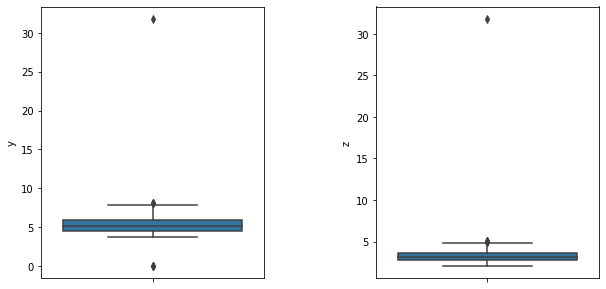

In [30]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [37]:
#your code here
diamonds.loc[(diamonds['z'] > 10)]

Unnamed: 0  carat        cut  color  clarity  depth  table  price  \
48410       48411   0.51  Very Good      5        4   61.8   54.7   1970   

          x     y     z  
48410  5.12  5.15  31.8

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [47]:
#your code here
diamonds['z'].loc[48410] = 0

def calculate_z(row):
    
    '''
    Input: depth percentage, x and y
    Output: z value 
    
    Input: 56.9 , 4.05, 4.07
    Ouput: 2.31
    
    '''
    
    if row.x > 0 and row.y > 0 and row.z == 0:
        row.z = ((row.depth/100) * (row.x + row.y) / 2)
        return row.z
    else:
        return row.z
        

# Create a lambda function to iterate over the lists
diamonds['z'] = diamonds.apply(lambda row : calculate_z(row), axis = 1)
diamonds


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide

Unnamed: 0  carat        cut  color  clarity  depth  table  price  \
0               1   0.23      Ideal      5        1   61.5   55.0    326   
1               2   0.21    Premium      5        2   59.8   61.0    326   
2               3   0.23       Good      5        4   56.9   65.0    327   
3               4   0.29    Premium      1        3   62.4   58.0    334   
4               5   0.31       Good      0        1   63.3   58.0    335   
...           ...    ...        ...    ...      ...    ...    ...    ...   
53935       53936   0.72      Ideal      6        2   60.8   57.0   2757   
53936       53937   0.72       Good      6        2   63.1   55.0   2757   
53937       53938   0.70  Very Good      6        2   62.8   60.0   2757   
53938       53939   0.86    Premium      2        1   61.0   58.0   2757   
53939       53940   0.75      Ideal      6        1   62.2   55.0   2757   

          x     y     z  
0      3.95  3.98  2.43  
1      3.89  3.84  2.31  
2      4.05  4.07  2.31  
3      4.20  4.23  2.63  
4      4.34  4.35  2.75  
...     ...   ...   ...  
53935  5.75  5.76  3.50  
53936  5.69  5.75  3.61  
53937  5.66  5.68  3.56  
53938  6.15  6.12  3.74  
53939  5.83  5.87  3.64  

[40455 rows x 11 columns]

Let's check if we actually corrected the outlier.

In [48]:
diamonds.loc[48410]

Unnamed: 0        48411
carat              0.51
cut           Very Good
color                 5
clarity               4
depth              61.8
table              54.7
price              1970
x                  5.12
y                  5.15
z               3.17343
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [ ]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [59]:
#your code here
diamonds.loc[(diamonds['y'] > 10)]

Unnamed: 0  carat    cut  color  clarity  depth  table  price     x  \
49189       49190   0.51  Ideal      5        4   61.8   55.0   2075  5.15   

          y     z  
49189  31.8  5.12

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [61]:
# Formula to define the y value 
def calculate_y(row):
    
    '''
    Input: depth percentage, x and y
    Output: z value 
    
    Input: 56.9 , 4.05, 4.07
    Ouput: 2.31
    
    '''
    
    if row.z > 0 and row.x > 0 and row.y == 31.8:
        row.y = (2 * row.z / (row.depth/100) - (row.x))
        return row.y
    else:
        return row.y
        

# Create a lambda function to iterate over the lists
diamonds['y'] = diamonds.apply(lambda row : calculate_y(row), axis = 1)
diamonds

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Unnamed: 0  carat        cut  color  clarity  depth  table  price  \
0               1   0.23      Ideal      5        1   61.5   55.0    326   
1               2   0.21    Premium      5        2   59.8   61.0    326   
2               3   0.23       Good      5        4   56.9   65.0    327   
3               4   0.29    Premium      1        3   62.4   58.0    334   
4               5   0.31       Good      0        1   63.3   58.0    335   
...           ...    ...        ...    ...      ...    ...    ...    ...   
53935       53936   0.72      Ideal      6        2   60.8   57.0   2757   
53936       53937   0.72       Good      6        2   63.1   55.0   2757   
53937       53938   0.70  Very Good      6        2   62.8   60.0   2757   
53938       53939   0.86    Premium      2        1   61.0   58.0   2757   
53939       53940   0.75      Ideal      6        1   62.2   55.0   2757   

          x     y     z  
0      3.95  3.98  2.43  
1      3.89  3.84  2.31  
2      4.05  4.07  2.31  
3      4.20  4.23  2.63  
4      4.34  4.35  2.75  
...     ...   ...   ...  
53935  5.75  5.76  3.50  
53936  5.69  5.75  3.61  
53937  5.66  5.68  3.56  
53938  6.15  6.12  3.74  
53939  5.83  5.87  3.64  

[40455 rows x 11 columns]

In [62]:
diamonds.loc[49189]

Unnamed: 0      49190
carat            0.51
cut             Ideal
color               5
clarity             4
depth            61.8
table              55
price            2075
x                5.15
y             11.4196
z                5.12
Name: 49189, dtype: object

In [64]:
def calc_y(depth, x, z):
    y = (2 * z / (depth/100) - (x))
    return y
print(calc_y(61.5, 3.95, 2.43)) #3.98)
print(calc_y(59.8, 3.89, 2.31)) #3.84
print(calc_y(56.9, 4.05, 2.31)) #4.07
print(calc_y(61.8, 5.15, 5.12)) #4.07

3.9524390243902445
3.8357525083612045
4.069507908611601
11.419579288025892


We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

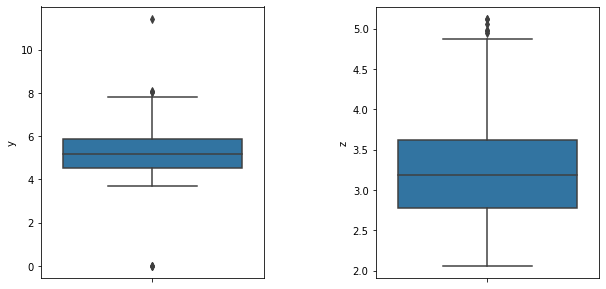

In [63]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


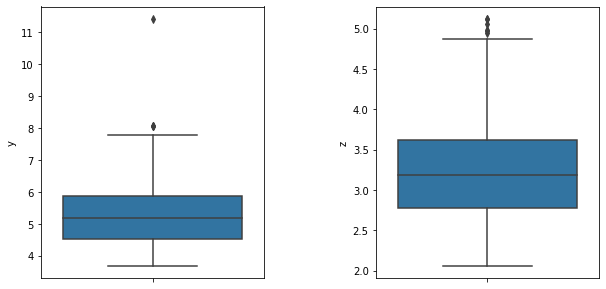

In [72]:
#your thoughts here
diamonds.dropna(inplace=True)
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)


In [83]:
diamonds = diamonds.loc[(diamonds['y'] < 11)]

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


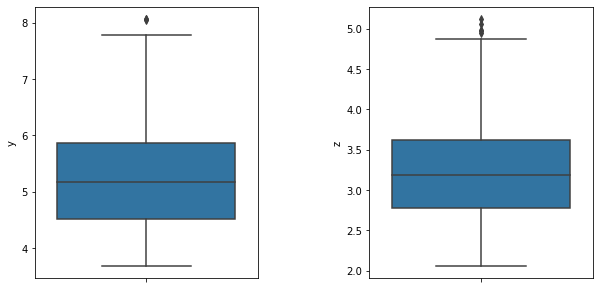

In [85]:
diamonds.dropna(inplace=True)
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [86]:
#your code here
diamonds.to_csv('diamonds_clean.csv', index=False)